<a href="https://colab.research.google.com/github/Laiba-Akhtar/Titanic/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

**LOADING THE DATASET**

In [ ]:
data = pd.read_csv("/content/train.csv")


In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


we have Survived as a target columns and other columns as features

In [ ]:
data.shape

(891, 12)

we have 891 passengers data

In [ ]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Handling null values**

In [ ]:
data.drop(columns='Cabin',inplace=True,axis=1)

In [ ]:

mean_age = data['Age'].mean()

# Fill missing values with the mean
data['Age'].fillna(mean_age, inplace=True)


In [ ]:

import pandas as pd

embarked_counts = data['Embarked'].value_counts()

# Display the counts
print(embarked_counts)

S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [ ]:
#Now filling null values with the most occured
data['Embarked'].fillna('S',inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [ ]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**FINDING HOW MANY PEOPLE SURVIVED**

In [ ]:
import pandas as pd

embarked_counts = data['Survived'].value_counts()

# Display the counts
print(embarked_counts)

0    549
1    342
Name: Survived, dtype: int64


**DATA VISUALIZATION**

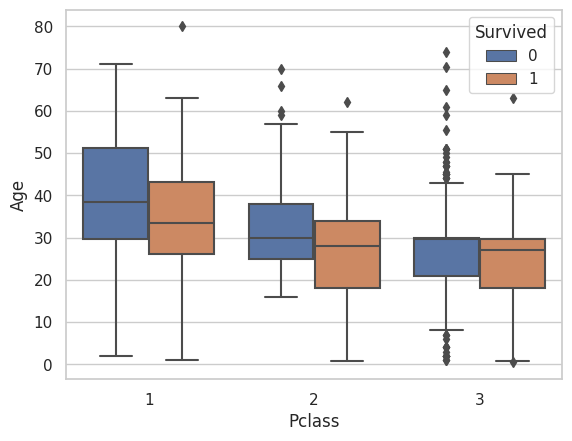

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for Seaborn plots
sns.set(style="whitegrid")


# Boxplot to compare survival by Pclass
sns.boxplot(x='Pclass', y='Age', hue='Survived', data=data)
plt.show()



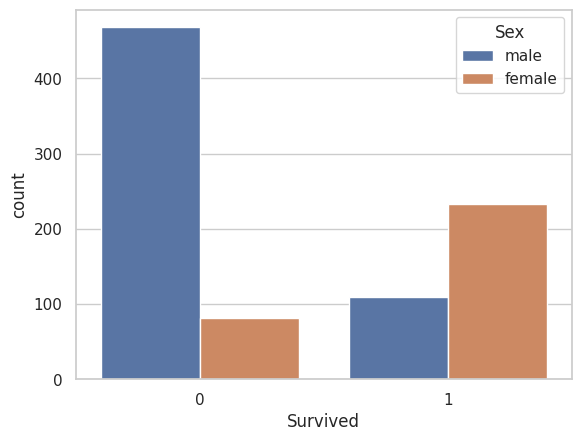

In [ ]:
# Countplot for the number of survivors by Sex
sns.countplot(x='Survived', hue='Sex', data=data)
plt.show()



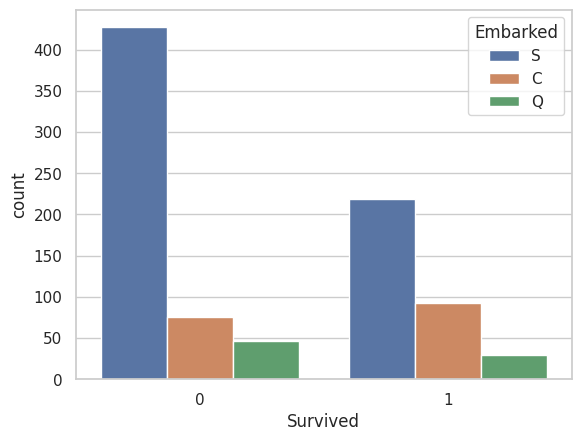

In [ ]:
# Countplot for the number of survivors by Embarked port
sns.countplot(x='Survived', hue='Embarked', data=data)
plt.show()



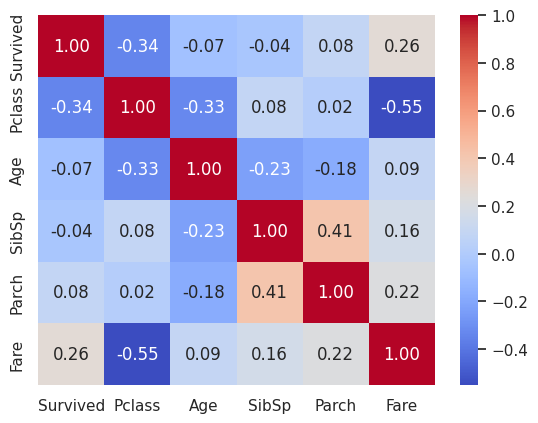

In [ ]:
# Heatmap to visualize correlations between numerical columns
correlation_matrix = data[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

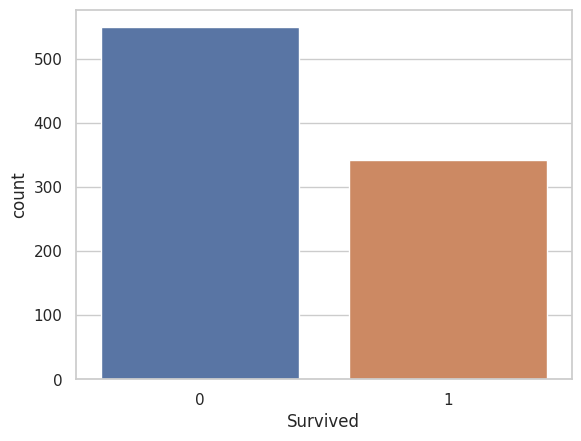

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Survived' is the column you want to plot and 'data' is your DataFrame
sns.countplot(x='Survived', data=data)
plt.show()


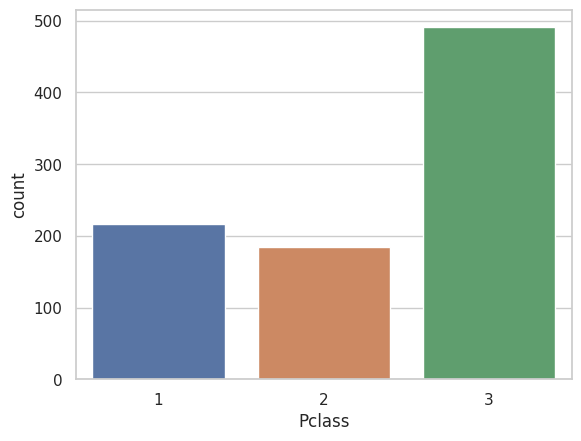

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Survived' is the column you want to plot and 'data' is your DataFrame
sns.countplot(x='Pclass', data=data)
plt.show()


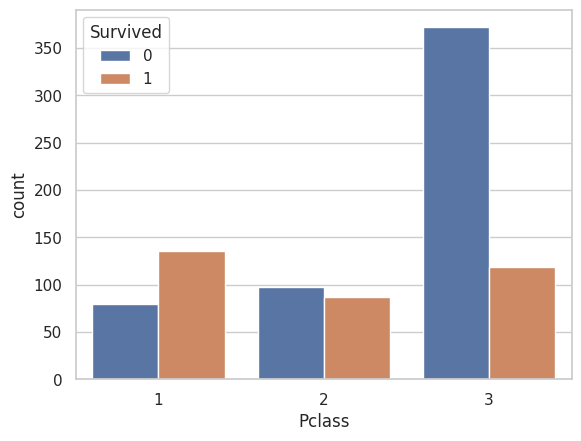

In [ ]:
# Countplot for the number of survivors by Embarked port
sns.countplot(x='Pclass', hue='Survived', data=data)
plt.show()


**Encoding Categorical columns for sex**

In [ ]:
# Assuming 'Sex' is the column you want to convert in your DataFrame 'data'
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})


In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S


Encoding column for embarked on the basis of value count

In [ ]:

embarked_counts = data['Embarked'].value_counts()

# Display the counts
print(embarked_counts)


S    646
C    168
Q     77
Name: Embarked, dtype: int64


In [ ]:
data['Embarked'] = data['Embarked'].map({'S': 1, 'C': 2,'Q': 3})

**MODEL BUILDING**

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,1


**DROPING UNUSED COLUMNS IN PREDICTING EITHER THE PASSENGER SURVIVED OR NOT**

In [ ]:
columns_to_drop = ['PassengerId', 'Name', 'Ticket']
data.drop(columns=columns_to_drop, inplace=True)


In [ ]:
Y=data['Survived']
# Drop 'Survived' column in-place
data.drop(columns=['Survived'], inplace=True)

X=data

SPLITTING AND APPLYING MODEL LOGISTIC REGRESSION FOR BINARY CLASSSIFICATION
THE CLASSIFICATION REPORT IS GENERATED AT THE END

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming 'X' is your feature matrix and 'y' is your target variable
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Create a logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Additional metrics
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.7821229050279329
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.91      0.82       100
           1       0.84      0.62      0.72        79

    accuracy                           0.78       179
   macro avg       0.80      0.77      0.77       179
weighted avg       0.79      0.78      0.78       179

Confusion Matrix:
 [[91  9]
 [30 49]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Hyperparameter tuning For improving the performance

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Define a preprocessing pipeline with imputation and scaling for numeric features
numeric_features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Define a preprocessing pipeline for categorical features
categorical_features = ['Sex', 'Embarked']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a logistic regression model
#model = LogisticRegression()

# Define hyperparameters to tune
param_grid = {
    'classifier__penalty': ['l1', 'l2'],
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'classifier__solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'],
    'classifier__max_iter': [100, 200, 300],
    'classifier__class_weight': [None, 'balanced']
}

# Create a pipeline with preprocessing and logistic regression
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                             ('classifier', model)])

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model to make predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model with the best hyperparameters
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Additional metrics
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred));
best_model.score(X_test,y_test)

Best Hyperparameters: {'classifier__C': 1, 'classifier__class_weight': None, 'classifier__max_iter': 100, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
Accuracy: 0.8044692737430168
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179

Confusion Matrix:
 [[90 15]
 [20 54]]


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
540 fits failed out of a total of 1800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dua

0.8044692737430168

SAVING THE MODEL

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import joblib

# Save the trained model using joblib
joblib.dump(model, 'trained_model.joblib')

['trained_model.joblib']

Predicting from the model

And Saving the data into predictions model

In [ ]:
import pandas as pd

# Load the test data from 'test.csv'
test_data = pd.read_csv('/content/test.csv')

# Assuming 'test_data' has the same columns as your training data
# Use the same preprocessing pipeline on the test data
X_test_data = test_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

# Make predictions using the trained model
predictions = best_model.predict(X_test_data)

# Create a DataFrame with the predictions
results_df = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Survived': predictions})

# Save the results to a CSV file
results_df.to_csv('predictionsmodel.csv', index=False)





Comparing the predicted output

In [ ]:
import pandas as pd

# Load the test data from 'test.csv'
test_data1 = pd.read_csv('/content/predictionfinal.csv')
test_data2 = pd.read_csv('/content/gender_submission.csv')

# Create a DataFrame with the predictions
results_df = pd.DataFrame({
    'PassengerId': test_data1['PassengerId'],  # Assuming 'PassengerId' is a common column in both DataFrames
    'Survived_test_data1': test_data1['Survived'],
    'Survived_test_data2': test_data2['Survived']
})

# Save the results to a CSV file
results_df.to_csv('predictions_combined.csv', index=False)


In [ ]:
# Load the test data from 'test.csv'
test_data1 = pd.read_csv('/content/predictions.csv')
test_data2 = pd.read_csv('/content/gender_submission.csv')
# Assuming 'test_data1' is your DataFrame
survived_value_counts1 = test_data1['Survived'].value_counts()
print(survived_value_counts1)
survived_value_counts2 = test_data2['Survived'].value_counts()
print(survived_value_counts2)



0    230
1    188
Name: Survived, dtype: int64
0    266
1    152
Name: Survived, dtype: int64
